In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# Pandas intersect

In [18]:
# Functions for reading .GFF and .BED files

def read_gff(path_to_file):
    gff = pd.read_csv(path_to_file, sep="\t", names=["chrom", "source", "type", "start", "end", "score", "strand", "phase", "attributes"], header=0)
    return gff

def read_bed(path_to_file):
    bed = pd.read_csv(path_to_file, sep="\t", names=["chrom", "chromStart", "chromEnd", "name", "bed_score", "bed_strand"])
    return bed

In [19]:
# Example of standard reading of .GFF file. Cutting long string around type of RNA

rgff = read_gff("/home/asklepiad/bioinf/python/git_projects_BI_2022/hw6/rrna_annotation.gff")
rgff["attributes"] = rgff["attributes"].str.removeprefix("Name=").str.replace("_rRNA.*", "")
rgff

/tmp/ipykernel_6525/2091539338.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  rgff["attributes"] = rgff["attributes"].str.removeprefix("Name=").str.replace("_rRNA.*", "")


,chrom,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [5]:
# Table of RNA types number per chromosome

number_of_rnas = rgff.groupby(["chrom", "attributes"], as_index=False).size()
number_of_rnas["chrom"] = number_of_rnas["chrom"].str.removeprefix("Reference_")
number_of_rnas

,chrom,attributes,size
0,1,16S,2
1,1,23S,2
2,1,5S,2
3,10,16S,5
4,10,23S,5
...,...,...,...
71,8,16S,2
72,8,23S,2
73,9,16S,6
74,9,23S,6


<AxesSubplot: xlabel='chrom', ylabel='size'>

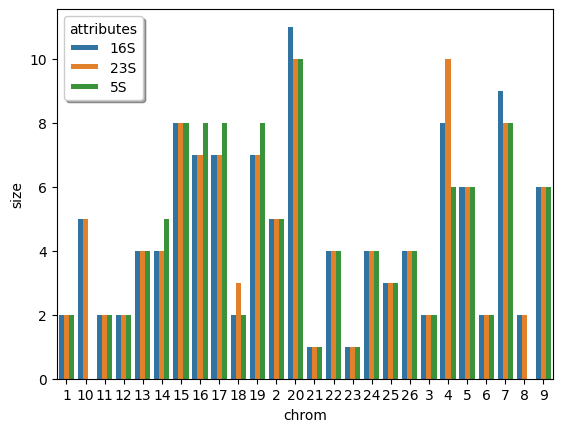

In [20]:
# Creating barplot by previously-described data

sns.barplot(number_of_rnas, x=number_of_rnas.iloc[:, 0], y=number_of_rnas.iloc[:, 2], hue=number_of_rnas.iloc[:, 1])

In [ ]:
# Reading .BED file

rbed = read_bed("/home/asklepiad/bioinf/python/git_projects_BI_2022/hw6/alignment.bed")
rbed

In [ ]:
# Bedtools intersect without bedtools

inter_before = pd.merge(rgff, rbed, on="chrom")
inter_before

# Volcano plot

In [10]:
# Downloading data

difexpr = pd.read_csv("/home/asklepiad/bioinf/python/git_projects_BI_2022/hw6/diffexpr_data.tsv.gz", sep="\t")
difexpr['quater'] = "0"
difexpr

,Sample,logFC,pval,pval_corr,log_pval,quater
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000,0
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000,0
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000,0
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000,0
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000,0
...,...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,0
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000,0
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,0
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000,0


In [11]:
# Subseting data

df1 = difexpr[(difexpr['pval_corr'] > 0.05) & (difexpr['logFC'] >= 0)]
df1['quater'] = "Non-significantly upregulated"

df2 = difexpr[(difexpr['pval_corr'] >0 .05) & (difexpr['logFC'] < 0)]
df2['quater'] = "Non-significantly downregulated"

df3 = difexpr[(difexpr['pval_corr'] <= 0.05) & (difexpr['logFC'] < 0)]
df3['quater'] = "Significantly upregulated"

df4 = difexpr[(difexpr['pval_corr'] <= 0.05) & (difexpr['logFC'] >= 0)]
df4['quater'] = "Significantly downregulated"

/tmp/ipykernel_6525/2911021990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['quater'] = "Non-significantly upregulated"
/tmp/ipykernel_6525/2911021990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['quater'] = "Non-significantly downregulated"
/tmp/ipykernel_6525/2911021990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [12]:
# Preparing extremal values for annotation

df4_max = df4['logFC'].nlargest(2)
df3_min = df3['logFC'].nsmallest(2)
for i in df4_max:
    print(df4.query('logFC == @i')[['Sample', 'logFC', 'log_pval']])
for j in df3_min:
    print(df3.query('logFC == @j')[['Sample', 'logFC', 'log_pval']])
point_min1 = [-10.661093, 52.117378, 'UMOD']
point_min2 = [-9.196481, 2.171498, 'MUC7']
point_max1 = [4.571915, 3.075183, 'ZIC2']
point_max2 = [4.276745, 4.121027, 'ZIC5']

   Sample     logFC  log_pval
64   ZIC2  4.571915  3.075183
   Sample     logFC  log_pval
88   ZIC5  4.276745  4.121027
      Sample      logFC   log_pval
20529   UMOD -10.661093  52.117378
      Sample     logFC  log_pval
20527   MUC7 -9.196481  2.171498


In [13]:
# Combining separated data

difexpr2 = pd.concat((df1, df2, df3, df4))
difexpr2

,Sample,logFC,pval,pval_corr,log_pval,quater
0,PNLIP,10.092524,6.590327e-01,1.000000,-0.000000,Non-significantly upregulated
1,CELA2A,8.691414,5.823905e-01,1.000000,-0.000000,Non-significantly upregulated
2,CLPS,8.054078,6.517331e-01,1.000000,-0.000000,Non-significantly upregulated
3,MPO,7.817773,4.483336e-01,1.000000,-0.000000,Non-significantly upregulated
4,AMY2A,7.285231,6.324412e-01,1.000000,-0.000000,Non-significantly upregulated
...,...,...,...,...,...,...
8849,SLC4A1AP,0.191584,1.061339e-06,0.021789,1.661757,Significantly downregulated
8856,CSNK1D,0.191071,2.134895e-06,0.043829,1.358234,Significantly downregulated
8865,UBTF,0.190533,6.790263e-07,0.013940,1.855724,Significantly downregulated
9088,C15orf44,0.177215,9.416174e-07,0.019331,1.713737,Significantly downregulated


In [14]:
# rcParams is simply the best

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams["mathtext.bf"] = 'sans:bold:italic'
plt.rcParams['legend.markerscale'] = 0.7
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.handleheight'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.4

In [15]:
# Computing some additional information for beautiful axises.

x_lim_tick = ceil(max(abs(min(difexpr2['logFC'])), abs(max(difexpr2['logFC']))))

Text(-10.196481, 12.171498, 'MUC7')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


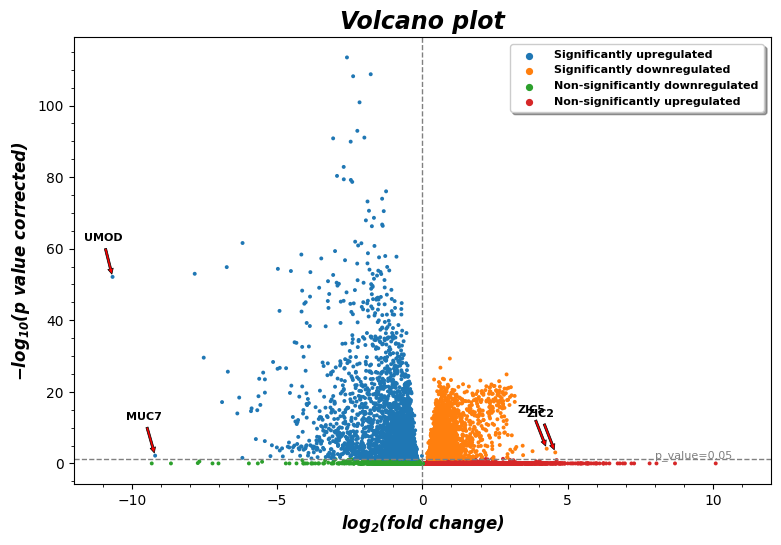

In [16]:
# Volcano plot

volcano_plot = plt.figure(figsize=(9.0, 5.8))
volcan = sns.scatterplot(data=difexpr2, x=difexpr2['logFC'], y=difexpr2['log_pval'],  hue=difexpr2['quater'], s=8, linewidth=0, \
                        hue_order=['Significantly upregulated', 'Significantly downregulated', 'Non-significantly downregulated', 'Non-significantly upregulated'])



# Axises and title

volcan.axhline(1.301, linestyle="--", color="grey", linewidth=1)
volcan.axvline(0, linestyle="--", color="grey", linewidth=1)
volcan.text(x=8, y=1.5, s="p_value=0.05", size=8, color="grey")
volcan.set_xlabel('$\mathbf{log_2}$(fold change)', weight='bold', style='italic', fontsize='12')
volcan.set_ylabel('$\mathbf{-log_{10}}$(p value corrected)', weight='bold', style='italic', fontsize='12')
volcan.set_title('Volcano plot', weight='bold', style='italic', fontsize='17')
volcan.set_xticks(ticks = np.arange(-x_lim_tick, x_lim_tick + 1, 1), minor=True)
volcan.set_yticks(ticks = np.arange(-5, max(difexpr2['log_pval']) + 5, 5), minor=True)
volcan.set_xlim(-x_lim_tick-1, x_lim_tick+1)


# Legend

legend = volcan.legend(loc = "upper right")
plt.setp(volcan.get_legend().get_texts(), fontsize='8', weight="bold")


# Annotations

volcan.annotate(point_max1[2], xy=(point_max1[0], point_max1[1]), xytext=(point_max1[0]-1, point_max1[1]+10,),\
                fontsize=8, weight="bold", arrowprops=dict(arrowstyle="simple", fc="red", linewidth=0.5))
volcan.annotate(point_max2[2], xy=(point_max2[0], point_max2[1]), xytext=(point_max2[0]-1, point_max2[1]+10,),\
                fontsize=8, weight="bold", arrowprops=dict(arrowstyle="simple", fc="red", linewidth=0.5))
volcan.annotate(point_min1[2], xy=(point_min1[0], point_min1[1]), xytext=(point_min1[0]-1, point_min1[1]+10,),\
                fontsize=8, weight="bold", arrowprops=dict(arrowstyle="simple", fc="red", linewidth=0.5))
volcan.annotate(point_min2[2], xy=(point_min2[0], point_min2[1]), xytext=(point_min2[0]-1, point_min2[1]+10,),\
                fontsize=8, weight="bold", arrowprops=dict(arrowstyle="simple", fc="red", linewidth=0.5))

In [17]:
volcano_plot.savefig("volcano_plot_sotnikov.png", bbox_inches="tight", dpi=600)